Back to the main [Index](index.ipynb) <a id="top"></a>

# Postprocessing tools for Bethe-Salpeter calculations

The Bethe-Salpeter code saves the optical spectra in the `MDF.nc` file.
This notebook explains how to use the AbiPy API to analyze the results.

## Table of Contents
[[back to top](#top)]

- [How to analyze a single MDF file](#How-to-analyze-a-single-MDF-file)
- [Analyzing multiple MDF files with robots](#Analyzing-multiple-MDF-files-with-robots)

Let's start by importing the basic modules we will need for this tutorial.

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

# This line configures matplotlib to show figures embedded in the notebook.
# Replace `inline` with `notebook` in classic notebook
%matplotlib inline   

# Option available in jupyterlab. See https://github.com/matplotlib/jupyter-matplotlib
#%matplotlib widget  

## How to analyze a single MDF file  
[[back to top](#top)]

Use `abiopen` to open the MDF:

In [2]:
mdf_file = abilab.abiopen(abidata.ref_file("tbs_4o_DS2_MDF.nc"))
print(mdf_file)

================================= File Info =================================
Name: tbs_4o_DS2_MDF.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/si_bse
Size: 104.53 kb
Access Time: Sat Aug 11 18:29:15 2018
Modification Time: Wed Nov  8 01:06:20 2017
Change Time: Wed Nov  8 01:06:20 2017

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.823046   3.823046   3.823046
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True
================================== Q-points ==================================
0) [+0.939, +0.000, +0.000], weight: 0.000
1) [+0.000, +0.939, +0.000], weight: 0.000
2) [+0.000, +0.000, +0.939], weight: 0.000
3) [+0.000, +0.813, +0.813], weight: 0.000
4) [+0.813, +0.000, +0.813], weig

To plot the (averaged) imaginary part of the macroscopic dielectric function (MDF)
between 2 and 5 eV use:

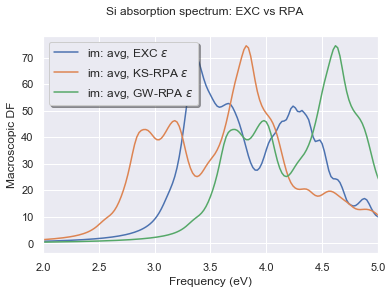

In [3]:
mdf_file.plot_mdfs(title="Si absorption spectrum: EXC vs RPA", xlims=(2, 5));

To select the MDF computed for the first q-point, use

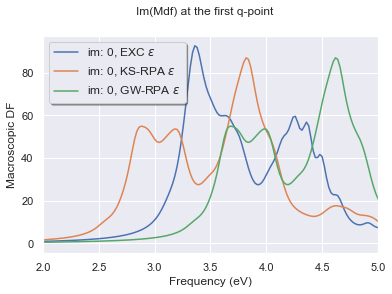

In [4]:
mdf_file.plot_mdfs(title="Im(Mdf) at the first q-point", qpoint=0, xlims=(2, 5));

* EXC: MDF with excitonic effects included
* KS-RPA: MDF computed with KS eigenvalues
* GW-RPA: MDF computed at the RPA level with KS + scissors operator

To plot the (averaged) real part of the MDF:

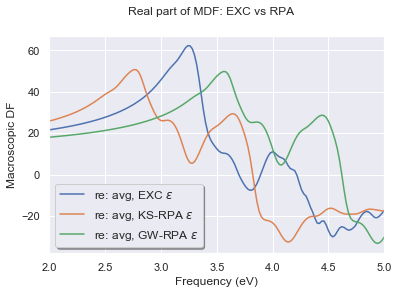

In [5]:
mdf_file.plot_mdfs(cplx_mode="re", title="Real part of MDF: EXC vs RPA", xlims=(2, 5));

<div class="alert alert-info" role="alert">
Alternatively one can use `abiopen.py FILE_MDF.nc -nb` to generate a jupyter notebook directly from the terminal
or `abiopen.py FILE_MDF.nc -e -sns` to produce matplotlib plots automatically.
</div>

## Analyzing multiple MDF files with robots
[[back to top](#top)]

To analyze the converge of the optical spectra, we can use the MdfRobot.
Let's build our robot from a list of MDF.nc files:

In [6]:
paths = abidata.ref_files("si_444_MDF.nc", "si_666_MDF.nc", "si_888_MDF.nc")
robot = abilab.MdfRobot.from_files(paths)
print(robot)

MdfRobot with 3 files in memory:

================================= File Info =================================
Name: si_444_MDF.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/si_bse_kpoints
Size: 102.53 kb
Access Time: Sat Aug 11 18:29:17 2018
Modification Time: Thu Feb 22 21:38:00 2018
Change Time: Thu Feb 22 21:38:00 2018

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.823046   3.823046   3.823046
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True
================================== Q-points ==================================
0) [+0.939, +0.000, +0.000], weight: 0.000
1) [+0.000, +0.939, +0.000], weight: 0.000
2) [+0.000, +0.000, +0.939], weight: 0.000
3) [+0.000, +0.813, +0.813], weight: 0

In [7]:
plotter = robot.get_multimdf_plotter()

To analyze the convergence of the (averaged) MDFs:

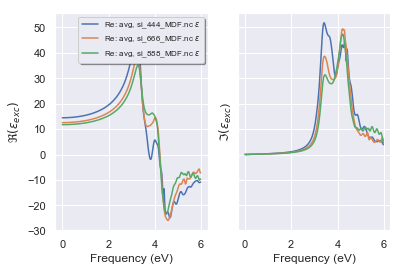

In [8]:
plotter.plot();

It is also possible to analyze the converge of the MDF for the different q-directions with:

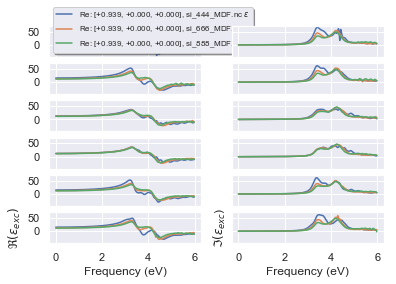

In [9]:
plotter.plot(qview="all");

<div class="alert alert-info" role="alert">
Robots can also be constructed from the command line with: `abicomp.py mdf FILES`.
Use the `--expose` option to generate plots automatically.
</div>

Back to the main [Index](index.ipynb)